# Principal Component Analysis with Cancer Data

In [15]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [16]:
df_cancer = pd.read_csv('breast-cancer-wisconsin-data.csv')
df_cancer.shape

(699, 11)

In [17]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [18]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [19]:
df_cancer.shape

(699, 11)

In [20]:
df_cancer.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [21]:
df_cancer.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

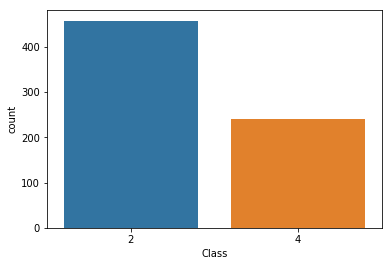

In [22]:
sns.countplot(x='Class',data=df_cancer)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [23]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df_cancer['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [24]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
print('Number of "?" in "Bare Nuclei" :', df_cancer['Bare Nuclei'][df_cancer['Bare Nuclei'] == '?'].count())

Number of "?" in "Bare Nuclei" : 16


In [25]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
df_cancer.replace(to_replace='?', value=df_cancer.describe(include='all')['Bare Nuclei']['top'], inplace=True)

In [26]:
print('Number of "?" in "Bare Nuclei" after Impute with Top:', df_cancer['Bare Nuclei'][df_cancer['Bare Nuclei'] == '?'].count())

Number of "?" in "Bare Nuclei" after Impute with Top: 0


In [27]:
#After Imputing with Top occurance, checking the value counts to ensure it is done
df_cancer['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [28]:
#Checking the data types of all object (esp Bare Nuclei) and convert the type to int64
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [29]:
#Converting 'Bare Nuclei' data type to int64
df_cancer['Bare Nuclei'] = df_cancer['Bare Nuclei'].astype('int64')

In [30]:
#Re-check the data types after all conversion
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [31]:
df_cancer.drop_duplicates(inplace=True)

In [32]:
df_cancer.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


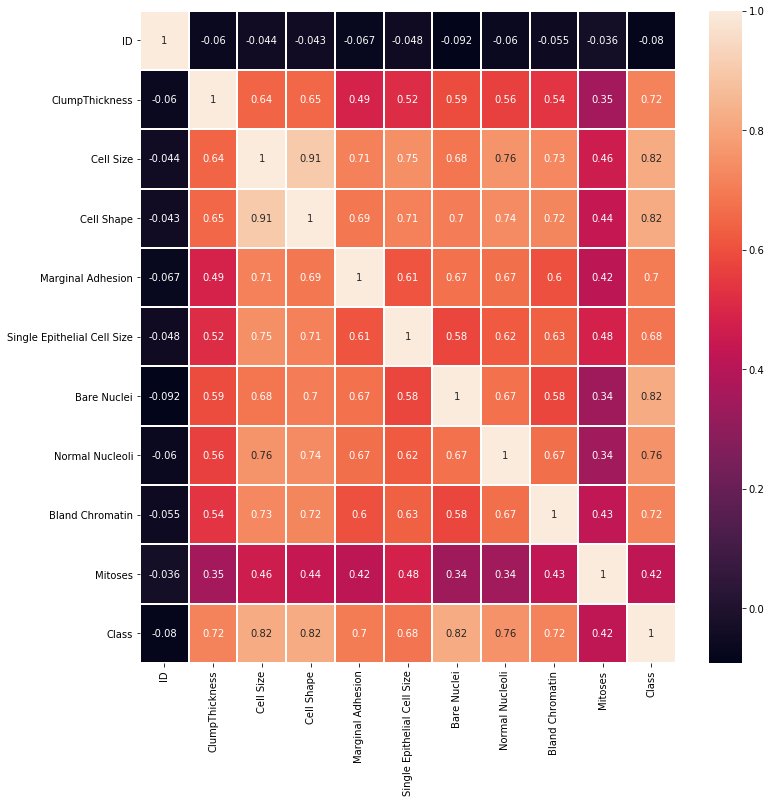

In [33]:
# Check for correlation of variable
plt.figure(figsize=(12,12))
sns.heatmap(df_cancer.corr(),annot=True,linewidths=1.0)

In [34]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

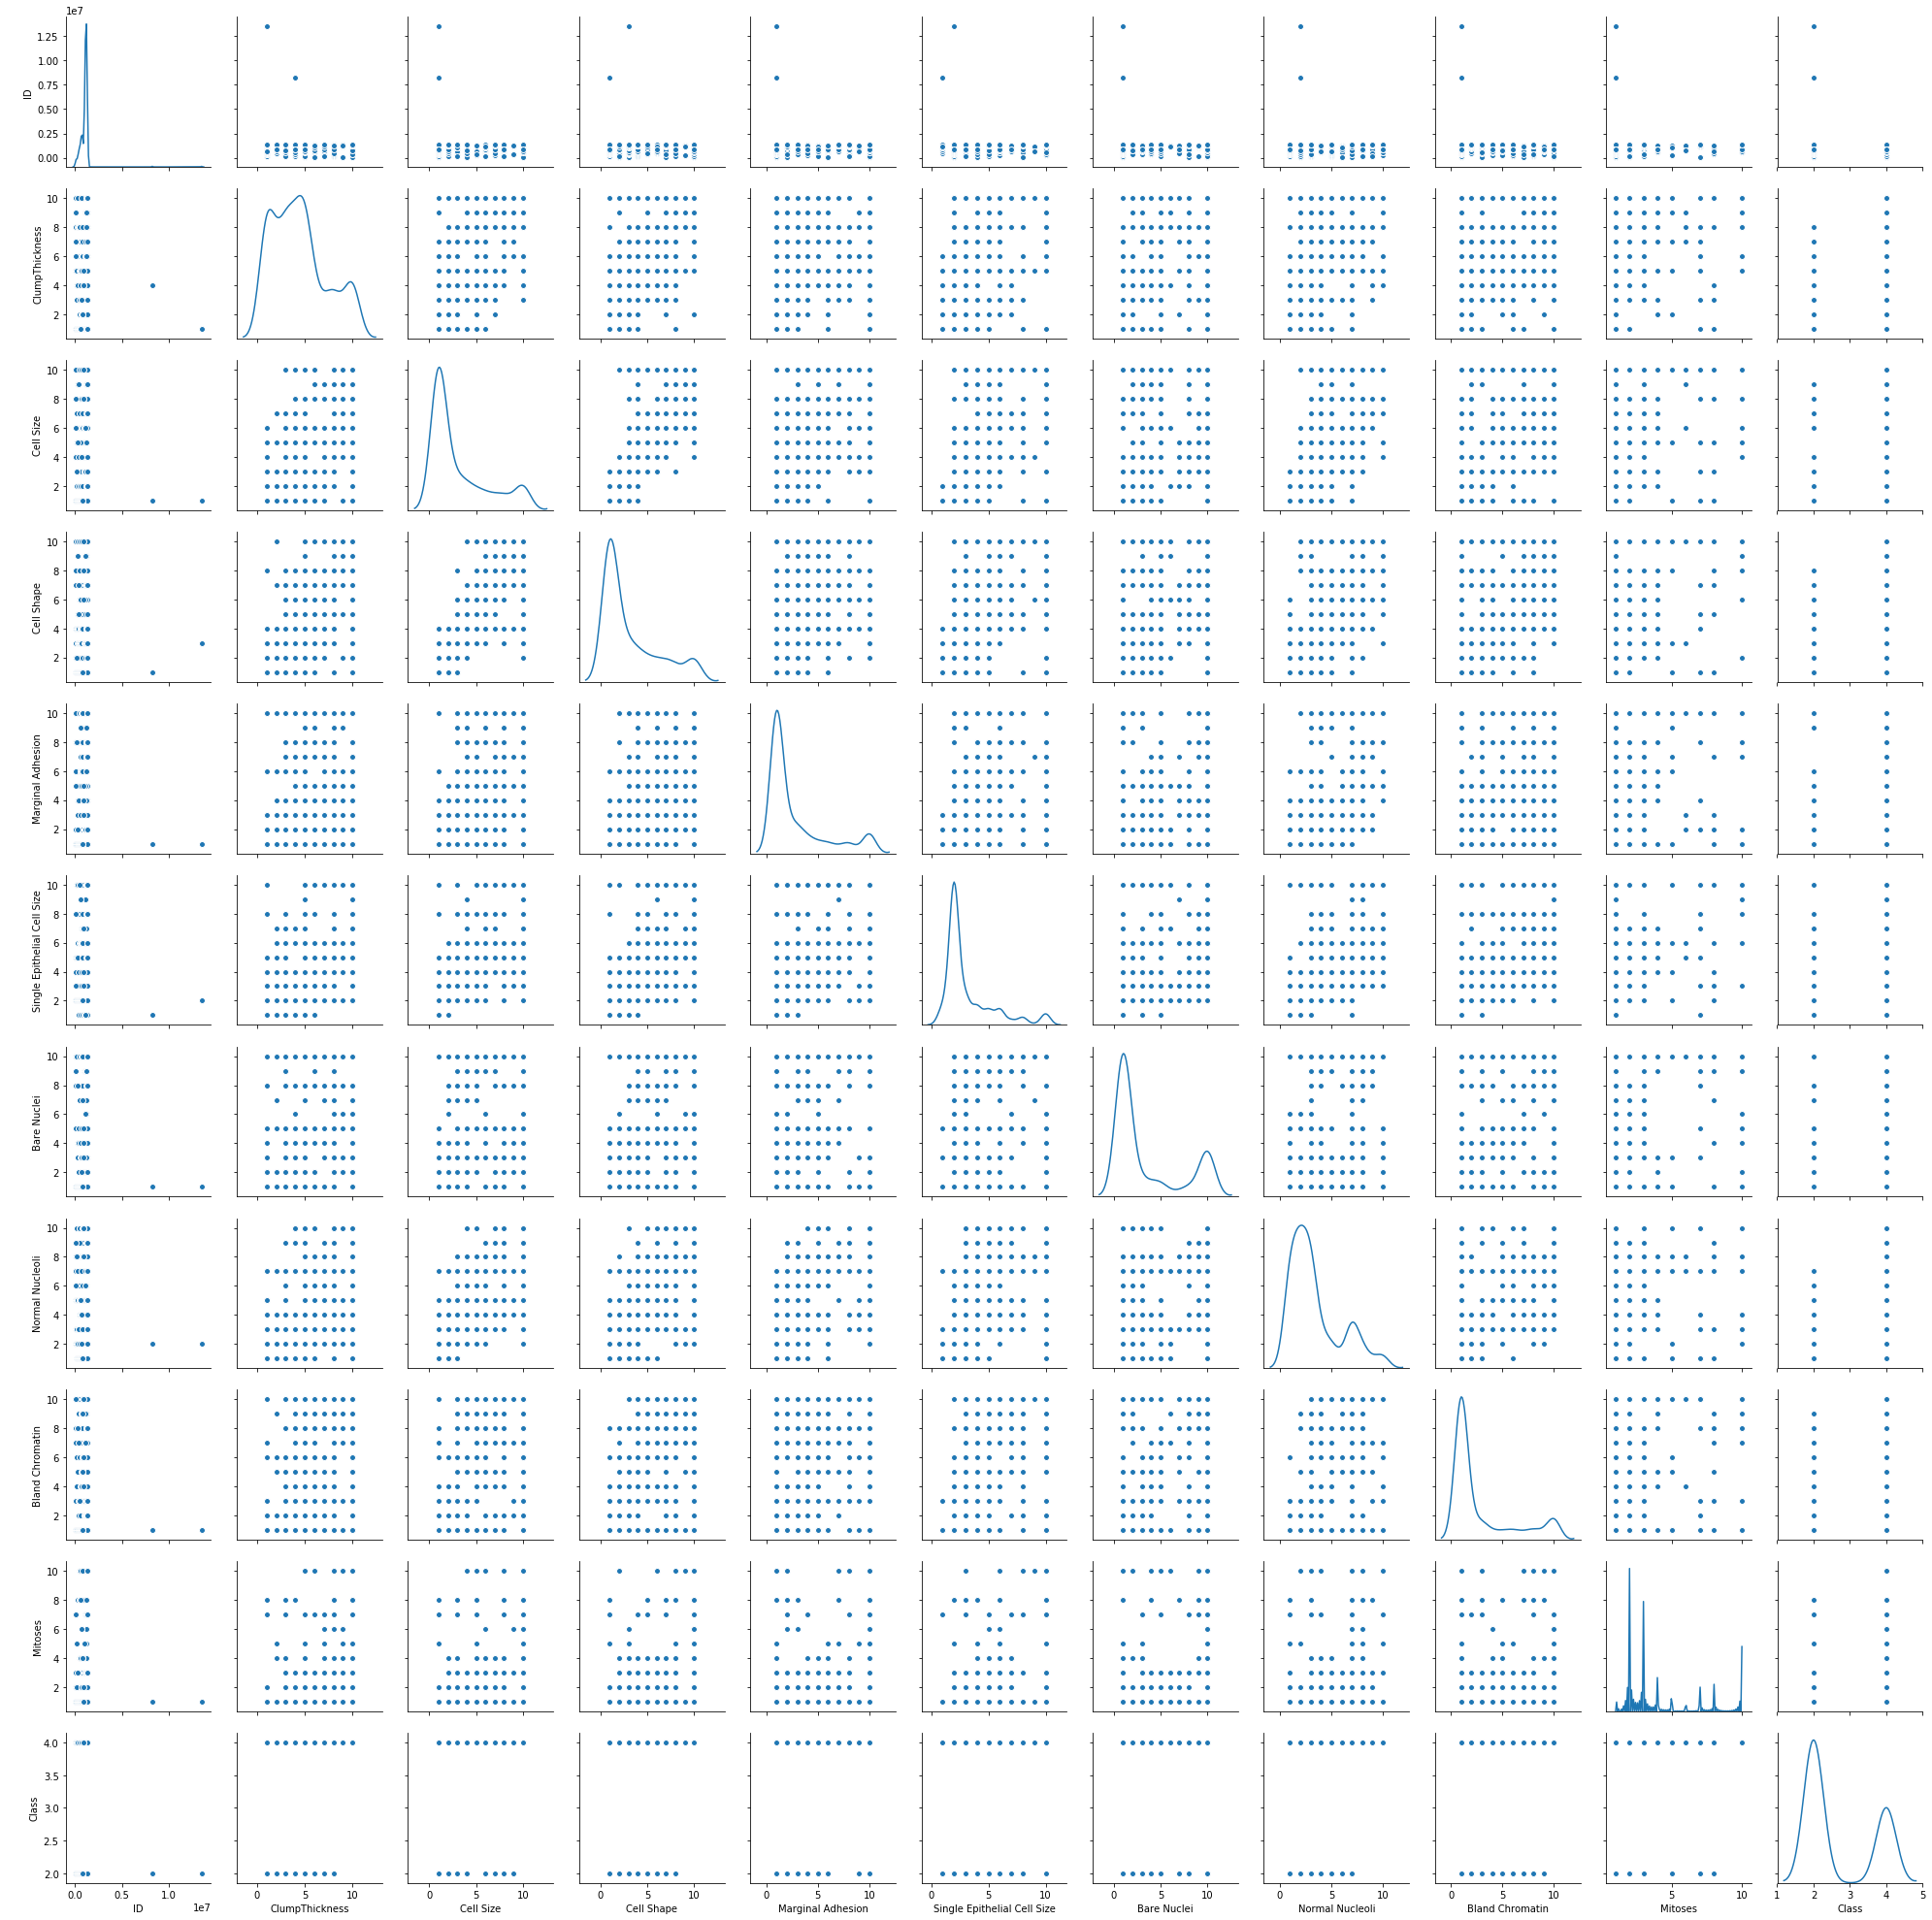

In [35]:
#Let us check for pair plots
sns.pairplot(df_cancer,diag_kind='kde')

In [36]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [37]:
# We could see most of the outliers are now removed.

In [38]:
# Removing the ID field, as it is not required for any analysis
df_cancer.drop(labels=['ID'],inplace=True, axis=1)

In [39]:
df_cancer.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,4.428986,3.133333,3.204348,2.827536,3.213043,3.482609,3.436232,2.885507,1.594203,2.689855
std,2.817378,3.042451,2.960844,2.867787,2.200964,3.617064,2.444060,3.067682,1.724230,0.951379
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


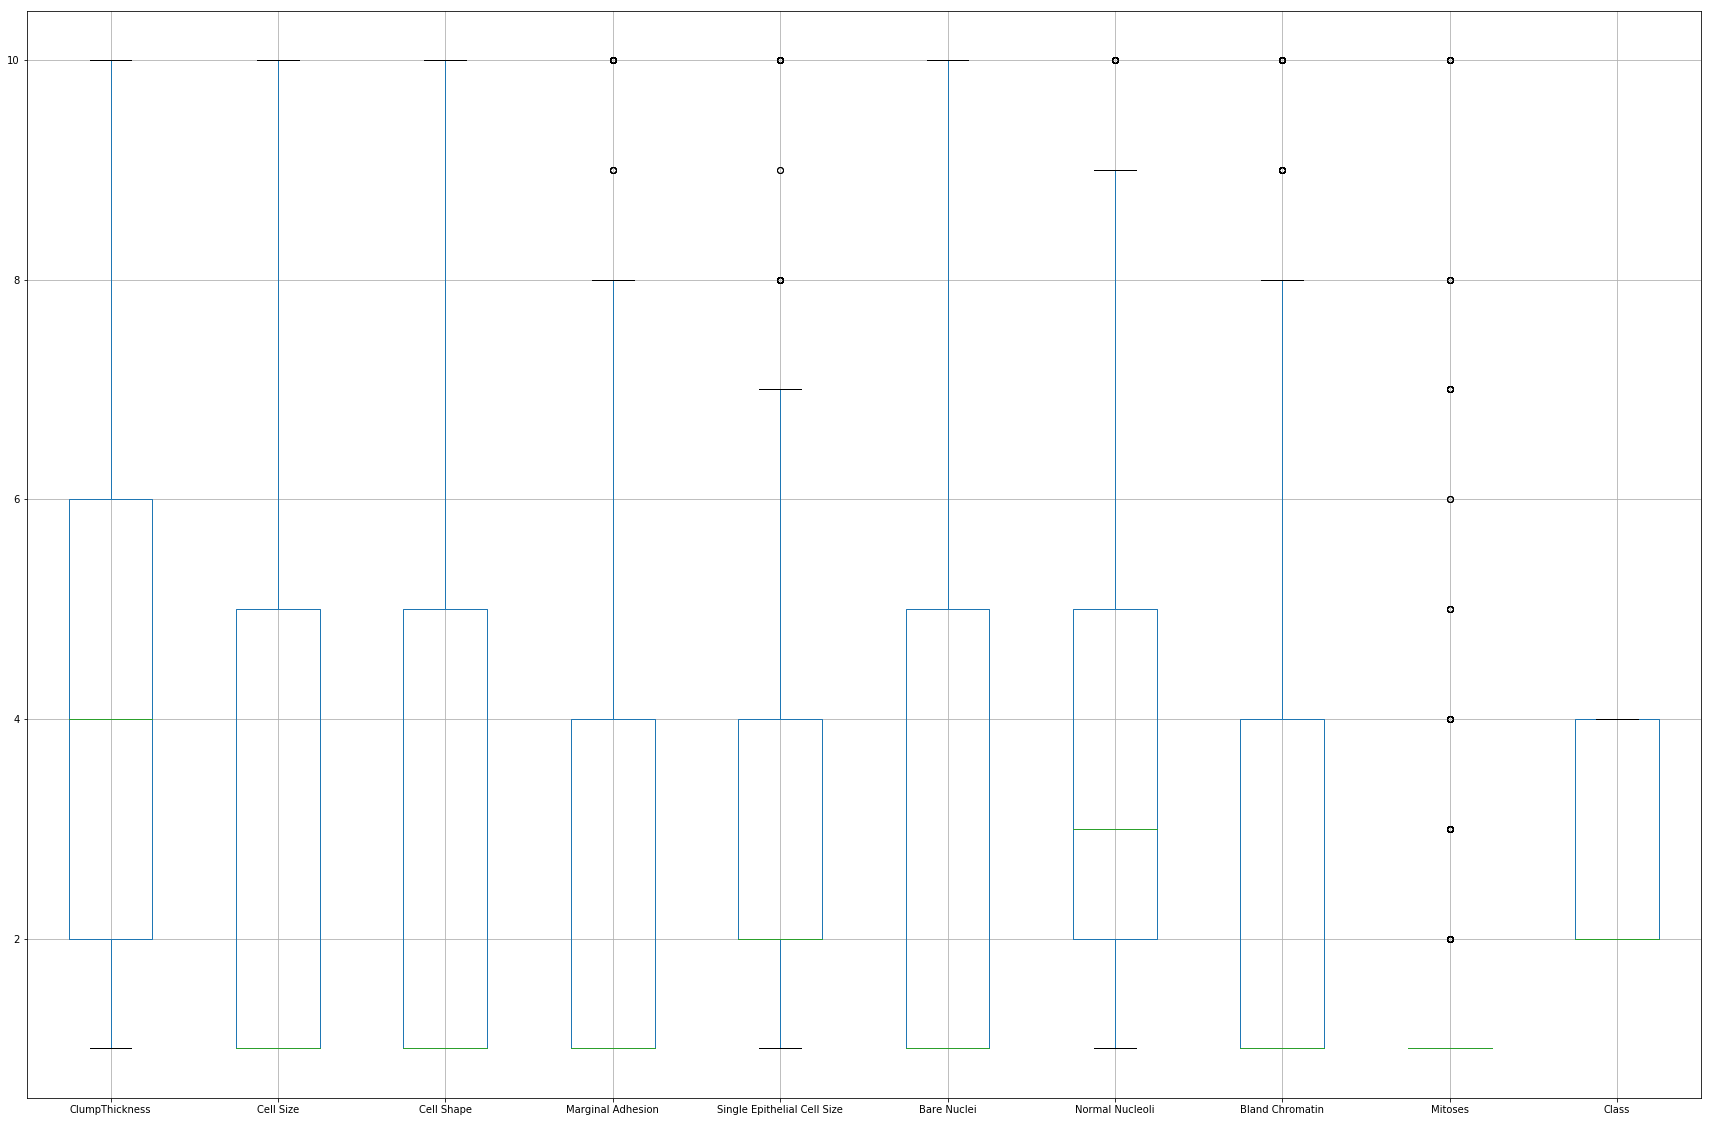

In [40]:
df_cancer.boxplot( figsize=(30,20))

In [41]:
def find_outliars(df):
    outliar_labels = []
    for i in range(1,df.columns.size):
        iqr = df[df.columns[i]].quantile(q=0.75) - df[df.columns[i]].quantile(q=0.25)
        upper_outliar_value = df[df.columns[i]].quantile(q=0.75) + iqr * 1.5
        lower_outliar_value = df[df.columns[i]].quantile(q=0.25) + iqr * 1.5
        if df[df.columns[i]].max() > upper_outliar_value :
            outliar = True
            outliar_labels.append(df.columns[i])   
        else:
            outliar = False
        #print(df.columns[i], iqr, outliar)
    return outliar_labels

In [42]:
print("Outliar Labels : ", find_outliars(df_cancer))

Outliar Labels :  ['Marginal Adhesion', 'Single Epithelial Cell Size', 'Normal Nucleoli', 'Bland Chromatin', 'Mitoses']


In [43]:
#Find and treat the outliars with 3rd quartile value
outliar_labels = find_outliars(df_cancer)
for col in outliar_labels:
    print(col)
    df_cancer[col] = np.where(df_cancer[col] > df_cancer[col].quantile(q=0.75), df_cancer[col].quantile(q=0.75), df_cancer[col])

Marginal Adhesion
Single Epithelial Cell Size
Normal Nucleoli
Bland Chromatin
Mitoses


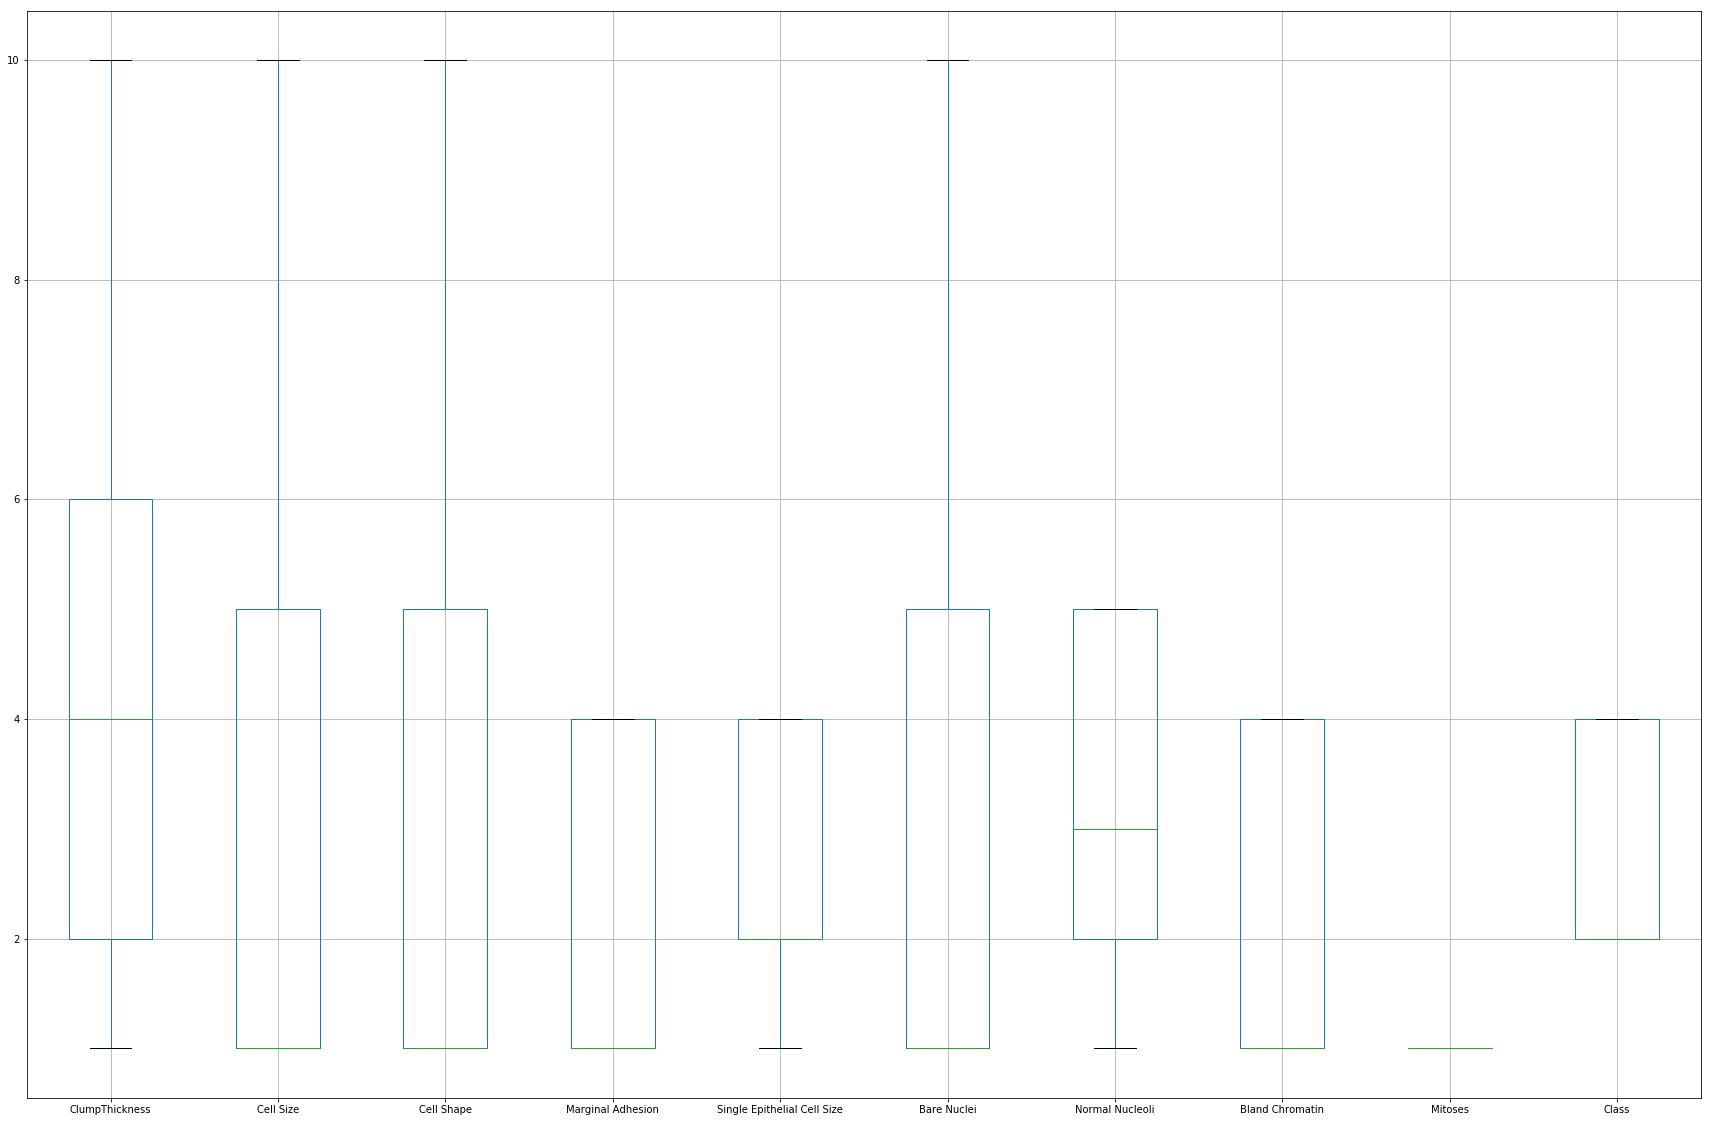

In [44]:
df_cancer.boxplot( figsize=(30,20))

In [45]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X = df_cancer.drop(labels=['Class'],axis=1)
y = df_cancer.Class

In [46]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state=1)

In [47]:
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.fit_transform(X_test)
X_std = std_scaler.fit_transform(X)

# Q6 Create a covariance matrix for identifying Principal components

In [48]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix_train = np.cov(X_train_std.T)
cov_matrix_test = np.cov(X_test_std.T)
cov_matrix = np.cov(X_std.T)

# Q7 Identify eigen values and eigen vector

In [49]:
# Step 2- Get eigen values and eigen vector
eigenval, eigenvec = np.linalg.eig(cov_matrix)

In [50]:
print("Eigen Value : ", eigenval)

Eigen Value :  [5.78965375 0.09149815 0.49306277 0.40714336 0.25621392 0.2863493
 0.32107985 0.36660992 0.        ]


In [51]:
print("Eigen Vector : ", eigenvec)

Eigen Vector :  [[ 0.31342808 -0.01445005  0.9124381   0.09860965  0.09082558 -0.0962776
   0.2022549   0.0293459   0.        ]
 [ 0.37937489 -0.72286891 -0.00583774 -0.36645941 -0.1142357  -0.02238539
  -0.35942354 -0.23763936  0.        ]
 [ 0.37726214  0.67979274  0.04498987 -0.32808981 -0.24972764  0.07025765
  -0.39784839 -0.2455702   0.        ]
 [ 0.34707615  0.04585818 -0.26752061  0.34722116  0.01102493 -0.59001151
   0.29016231 -0.50286784  0.        ]
 [ 0.36075167  0.06607829 -0.18881161 -0.21977369  0.7409318   0.390892
   0.2699902  -0.08288783  0.        ]
 [ 0.34766101 -0.08247825 -0.0846144   0.65544286 -0.27764678  0.59409238
  -0.07281375 -0.01512907  0.        ]
 [ 0.34846791  0.04202771 -0.13392983  0.21603513  0.27651374 -0.36232963
  -0.42887293  0.64847576  0.        ]
 [ 0.35015585 -0.00976042 -0.18189189 -0.32124942 -0.46226395 -0.01243881
   0.57035219  0.44929441  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.

# Q8 Find variance and cumulative variance by each eigen vector

In [52]:
tot = sum(eigenval)
var_exp = [( i /tot ) * 100 for i in sorted(eigenval, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.26578688  78.42013919  83.5020554   88.07803795  92.08571935
  95.65989817  98.85793068 100.         100.        ]


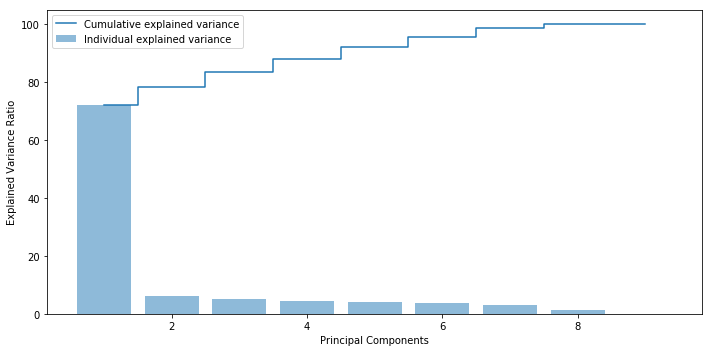

In [53]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenval.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenval.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [54]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_std)
X_pca = pca.transform(X_std)

In [55]:
pca.components_

array([[ 0.31342808,  0.37937489,  0.37726214,  0.34707615,  0.36075167,
         0.34766101,  0.34846791,  0.35015585, -0.        ],
       [-0.9124381 ,  0.00583774, -0.04498987,  0.26752061,  0.18881161,
         0.0846144 ,  0.13392983,  0.18189189,  0.        ],
       [-0.09860965,  0.36645941,  0.32808981, -0.34722116,  0.21977369,
        -0.65544286, -0.21603513,  0.32124942, -0.        ],
       [ 0.0293459 , -0.23763936, -0.2455702 , -0.50286784, -0.08288783,
        -0.01512907,  0.64847576,  0.44929441,  0.        ],
       [-0.2022549 ,  0.35942354,  0.39784839, -0.29016231, -0.2699902 ,
         0.07281375,  0.42887293, -0.57035219,  0.        ],
       [-0.0962776 , -0.02238539,  0.07025765, -0.59001151,  0.390892  ,
         0.59409238, -0.36232963, -0.01243881,  0.        ],
       [ 0.09082558, -0.1142357 , -0.24972764,  0.01102493,  0.7409318 ,
        -0.27764678,  0.27651374, -0.46226395,  0.        ],
       [ 0.01445005,  0.72286891, -0.67979274, -0.04585818, -0

In [56]:
pca.explained_variance_

array([5.78965375, 0.49306277, 0.40714336, 0.36660992, 0.32107985,
       0.2863493 , 0.25621392, 0.09149815, 0.        ])

In [57]:
pca.explained_variance_ratio_

array([0.72265787, 0.06154352, 0.05081916, 0.04575983, 0.04007681,
       0.03574179, 0.03198033, 0.01142069, 0.        ])

# Q10 Find correlation between components and features

In [58]:
df_comp = pd.DataFrame(pca.components_, columns=list(X.columns))

In [59]:
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.313428,0.379375,0.377262,0.347076,0.360752,0.347661,0.348468,0.350156,-0.0
1,-0.912438,0.005838,-0.044990,0.267521,0.188812,0.084614,0.133930,0.181892,0.0
2,-0.098610,0.366459,0.328090,-0.347221,0.219774,-0.655443,-0.216035,0.321249,-0.0
3,0.029346,-0.237639,-0.245570,-0.502868,-0.082888,-0.015129,0.648476,0.449294,0.0
4,-0.202255,0.359424,0.397848,-0.290162,-0.269990,0.072814,0.428873,-0.570352,0.0


In [60]:
df_comp.shape

(9, 9)

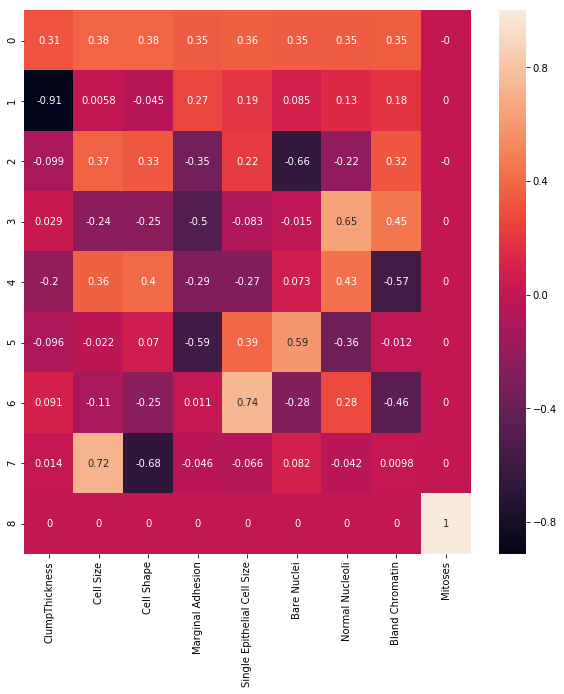

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(df_comp, annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [62]:
df_jokes = pd.read_csv('jokes.csv')
df_jokes.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [63]:
ratings_df = df_jokes.head(200)

In [64]:
ratings_df.shape

(200, 101)

In [65]:
ratings_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [66]:
ratings_df.replace(to_replace=99.00, value=0, inplace=True)

/Users/srirsri2/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [67]:
ratings_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [68]:
ratings_df.drop(labels=['NumJokes'], inplace=True,axis=1)
ratings_mean_df = ratings_df.mean()

/Users/srirsri2/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [69]:
print(" ========= Top 10 Rated Jokes")
ratings_mean_df.sort_values(ascending=False).head(10)

 ========= Top 10 Rated Jokes


Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64